In [1]:
import yt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import constants as C

In [2]:
time_list = [
    5, 10, 15, 20, 25, 30, 31, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 55,
    60, 65, 70, 75, 80, 85, 90, 95, 100
    ]

In [3]:
ds_array = []

for ii in range(10):
    ds_array = np.append( ds_array, 
                         yt.TipsyDataset('run694v2.0'+'%02d'%(ii+1)+'00', dataset_type='tipsy', 
                                         unit_base = {"mass":(2.33e5, "Msun")}) )

yt : [INFO     ] 2019-06-28 11:51:53,177 Parameters: current_time              = 1.0000000000000007
yt : [INFO     ] 2019-06-28 11:51:53,177 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-06-28 11:51:53,178 Parameters: domain_left_edge          = None
yt : [INFO     ] 2019-06-28 11:51:53,179 Parameters: domain_right_edge         = None
yt : [INFO     ] 2019-06-28 11:51:53,179 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-06-28 11:51:53,433 Allocating for 2.616e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-06-28 11:51:53,691 Adding 2.616e+06 particles
yt : [INFO     ] 2019-06-28 11:51:54,062 Identified 1.593e+05 octs
yt : [INFO     ] 2019-06-28 11:51:55,487 Parameters: current_time              = 2.0000000000000013
yt : [INFO     ] 2019-06-28 11:51:55,488 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-06-28 11:51:55,490 Parameters: domain_left_edge          = None
yt : [INFO     ] 2019-06-28 11:51:55,500

In [5]:
ii = 1
ds = ds_array[ii]

In [4]:
ds.derived_field_list

[('DarkMatter', 'Coordinates'),
 ('DarkMatter', 'Epsilon'),
 ('DarkMatter', 'Mass'),
 ('DarkMatter', 'Phi'),
 ('DarkMatter', 'Velocities'),
 ('DarkMatter', 'iord'),
 ('DarkMatter', 'mesh_id'),
 ('DarkMatter', 'particle_angular_momentum'),
 ('DarkMatter', 'particle_angular_momentum_magnitude'),
 ('DarkMatter', 'particle_angular_momentum_x'),
 ('DarkMatter', 'particle_angular_momentum_y'),
 ('DarkMatter', 'particle_angular_momentum_z'),
 ('DarkMatter', 'particle_cylindrical_velocity_theta'),
 ('DarkMatter', 'particle_cylindrical_velocity_z'),
 ('DarkMatter', 'particle_mass'),
 ('DarkMatter', 'particle_ones'),
 ('DarkMatter', 'particle_position'),
 ('DarkMatter', 'particle_position_cylindrical_radius'),
 ('DarkMatter', 'particle_position_cylindrical_theta'),
 ('DarkMatter', 'particle_position_cylindrical_z'),
 ('DarkMatter', 'particle_position_relative'),
 ('DarkMatter', 'particle_position_relative_x'),
 ('DarkMatter', 'particle_position_relative_y'),
 ('DarkMatter', 'particle_position_re

In [5]:
density = ds.all_data()[('Gas', 'Density')]
target  = np.where(density == density.max())[0][0]
del density

In [6]:
centerHost = ds.all_data()[('Gas', 'Coordinates')][target].in_units('kpc')
sphHost0 = ds.sphere(centerHost, (20, 'kpc')) 
centerHost = sphHost0.quantities.center_of_mass(use_gas=False, use_particles=True, particle_type='Stars')
sphHost1 = ds.sphere(centerHost, (20, 'kpc'))
sphHost_4_norm = ds.sphere(centerHost, (4, 'kpc'))

In [7]:
#计算 host 的角动量，作为其法线方向，再算出与法向量垂直的一个向量，当做画图时的北方
norm_host  = sphHost_4_norm.quantities.angular_momentum_vector(use_gas=False, use_particles=True, particle_type='Stars')
north_host = yt.YTArray(yt.ortho_find(norm_host), 'kpc')[1]

/home/protesticon/anaconda3/lib/python3.6/site-packages/yt/fields/derived_field.py:256: VisibleDeprecationWarning: The 'particle_velocity_relative' field has been deprecated in favor of 'relative_particle_velocity'.
  dd = self._function(self, data)


yt : [INFO     ] 2019-06-28 11:53:03,232 Projection completed
yt : [INFO     ] 2019-06-28 11:53:03,233 xlim = -47.500000 -22.500000
yt : [INFO     ] 2019-06-28 11:53:03,234 ylim = -12.500000 12.500000
yt : [INFO     ] 2019-06-28 11:53:03,235 xlim = -47.500000 -22.500000
yt : [INFO     ] 2019-06-28 11:53:03,236 ylim = -12.500000 12.500000
yt : [INFO     ] 2019-06-28 11:53:03,237 Making a fixed resolution buffer of (('deposit', 'Stars_density')) 800 by 800



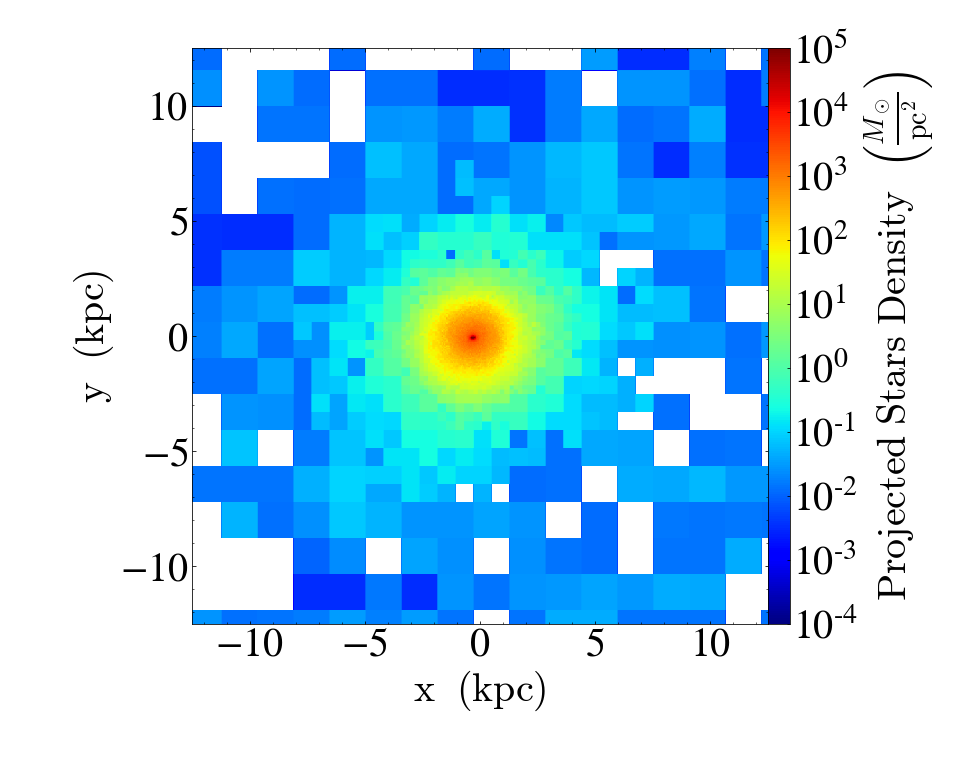

In [9]:
#全局的恒星质量密度分布
pp_all_star = yt.ProjectionPlot(ds, 'z',('deposit', 'Stars_density'), center=[-35., 0., 0.], width=(25, "kpc"), method='integrate', fontsize=40)
pp_all_star.set_unit(('deposit', 'Stars_density'), 'Msun/pc**2')
pp_all_star.set_cmap(('deposit', 'Stars_density'), 'jet')
pos_of_annotate = yt.YTArray([-60,60], input_units='kpc')
pp_all_star.annotate_text(pos_of_annotate, '6 Gyr', coord_system='plot', text_args={'color':'black'})
pp_all_star.set_zlim(('deposit', 'Stars_density'), 1e-4, 1e5)
#pp_all_star.annotate_text(yt.YTArray([20,30], input_units='kpc'), '%d'%2, coord_system='plot', text_args={'color':'black'})

#pp_all_star.save('694_0600_all_star.pdf')
pp_all_star

In [22]:
# 定义平均意义下的密度计算函数，返回值是两个数组，x 量被划分为多个区间，y 量在对应的区间内被平均
def Age_profile( x_field, xunits, y_field, yunits, z_field, zunits, n_bins ):
    import numpy as np
    xaxis   = yt.YTArray(np.zeros(n_bins), xunits)
    yaxis_t = yt.YTArray(np.zeros(n_bins), yunits+'*'+zunits)
    yaxis   = yt.YTArray(np.zeros(n_bins), yunits)
    zaxis_t = yt.YTArray(np.zeros((n_bins)), zunits)
    xstep   = (50*yt.units.kpc).in_units(xunits)  / n_bins
    locatex = 0;
        
    for jj in range(n_bins):# total mass profile
        boolean = (x_field.in_units(xunits)>jj*xstep) & (x_field.in_units(xunits)<=(jj+1)*xstep)
        # evrey radius bin, weighted by mass of stars
        yaxis_t[jj] = (y_field[boolean].in_units(yunits) * z_field[boolean].in_units(zunits)).sum()
        zaxis_t[jj] = z_field[boolean].sum().in_units(zunits)
    for ii in range(n_bins):# radius and density profile
        xaxis[ii] = ii * xstep
        yaxis[ii] = yaxis_t[ii] / zaxis_t[ii]
    
    return([xaxis, yaxis])

In [23]:
bins = 150
host_galaxy    = ds.disk(centerHost, norm_host, (50, "kpc"), (15, "kpc"))
r_cylindrical  = np.sqrt( (host_galaxy[('Stars', 'particle_position_relative_x')])**2 + (host_galaxy[('Stars', 'particle_position_relative_y')])**2 ).in_units('kpc')
[radius_a, age] = Age_profile(r_cylindrical, 'kpc', host_galaxy[('Stars', 'FormationTime')], 'Gyr',host_galaxy[('Stars', 'particle_mass')], 'Msun', bins)

/home/protesticon/anaconda3/lib/python3.6/site-packages/yt/fields/derived_field.py:256: VisibleDeprecationWarning: The 'particle_position_relative' field has been deprecated in favor of 'relative_particle_position'.
  dd = self._function(self, data)


In [24]:
r_1 = radius_a[np.where((ds.current_time-age).in_units('Gyr')==(ds.current_time-age).in_units('Gyr').min())[0][0]]

# r_2: outer most radius that d(age)/d(radius) is too large
age_data = np.gradient((ds.current_time-age).in_units('Gyr')).copy()
for i in range(0,20):
    #print(flat_background_data.mean(),np.std(flat_background_data,ddof=1))
    #print(len(flat_background_data)) 
    age_data=age_data[(age_data<age_data.mean()+2*np.std(age_data,ddof=1))&(age_data>age_data.mean()-2*np.std(age_data,ddof=1))]
    #更新一维数组
    #迭代3次,输出是检查循环的进行 
mean_age  = age_data.mean()
sigma_age = age_data.std(ddof=1)

r_2 = radius_a[(np.fabs(np.gradient((ds.current_time-age).in_units('Gyr'))-mean_age)>=1.3*sigma_age) & (radius_a<20)][-1]

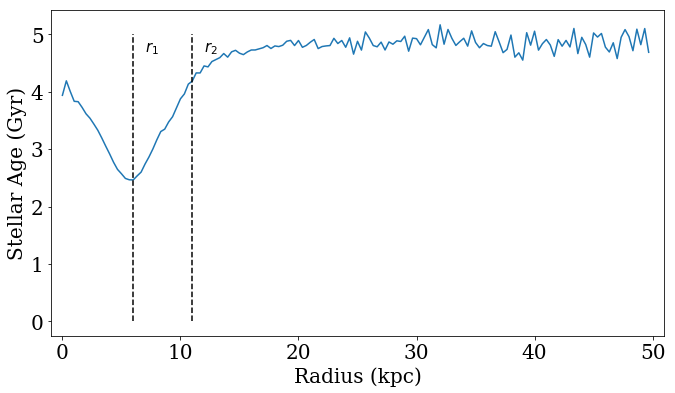

In [25]:
plt.figure(figsize=(11,6))
plt.plot(radius_a.in_units('kpc'), (ds.current_time-age).in_units('Gyr'))
plt.plot(np.ones(6)*r_1, np.arange(6),color='black',linestyle="--")
plt.plot(np.ones(6)*r_2, np.arange(6),color='black',linestyle="--")

plt.ylabel(r'Stellar Age (Gyr)',fontsize=20, family='serif', weight='ultralight')
plt.xlabel('Radius (kpc)',fontsize=20, family='serif', weight='ultralight')
plt.xticks(fontsize=20, family='serif')
plt.yticks(fontsize=20, family='serif')
plt.xlim([-1,51])
plt.annotate('$r_1$', xy =( float(r_1)+1, 4.7), fontsize=15 )
plt.annotate('$r_2$', xy =( float(r_2)+1, 4.7), fontsize=15 )
#plt.savefig('694_1000_age_profile.png',dpi=400)
plt.show()

In [26]:
# 定义平均意义下的密度计算函数，返回值是两个数组，x 量被划分为多个区间，y 量在对应的区间内被平均
def Density_and_Thick_Profile( x_field, xunits, y_field, yunits, z_field, zunits, n_bins ):
    import numpy as np
    xaxis   = yt.YTArray(np.zeros(n_bins), xunits)
    yaxis_t = yt.YTArray(np.zeros(n_bins), yunits)
    yaxis   = yt.YTArray(np.zeros(n_bins), yunits+'/'+xunits+'**2')
    zaxis_t = yt.YTArray(np.zeros((n_bins,n_bins)), yunits)
    zaxis   = yt.YTArray(np.zeros((n_bins,n_bins)), yunits+'/'+xunits+'**3')
    xstep   = (50*yt.units.kpc).in_units(xunits)  / n_bins
    zstep   = np.fabs(z_field).max() / n_bins
    locatex = locatez = 0;
        
    for jj in range(n_bins):# total mass profile
        booleanx = (x_field.in_units(xunits)>jj*xstep) & (x_field.in_units(xunits)<=(jj+1)*xstep)
        yaxis_t[jj] = ( y_field[booleanx].in_units(yunits) ).sum()
    
    for ii in range(n_bins):# radius and density profile
        xaxis[ii] = ii * xstep
        yaxis[ii] = yaxis_t[ii] / (C.pi*(2*ii+1)*xstep**2)
        zaxis[ii] = zaxis_t[ii] / (C.pi*(2*ii+1)*xstep**2) / (2*zstep)
    
    return([xaxis, yaxis, zaxis])

In [27]:
resolve = 0.1 * yt.units.kpc
from astropy.io import fits
obs = fits.open('fits/694_06_0.fits')

In [28]:
from astropy.table import Table
cata = Table.read('fits/694_06_0.txt', format='ascii')
ell = cata['col7'].copy()
ell[ell=='INDEF'] = np.nan
ell = ell.astype('float')

In [29]:
r_3 = cata['col2'][np.where(np.gradient(ell)==np.gradient(ell)[~np.isnan(np.gradient(ell))].min())][0]*resolve
r_3

16.0 kpc

In [30]:
t_height = 4*yt.units.kpc

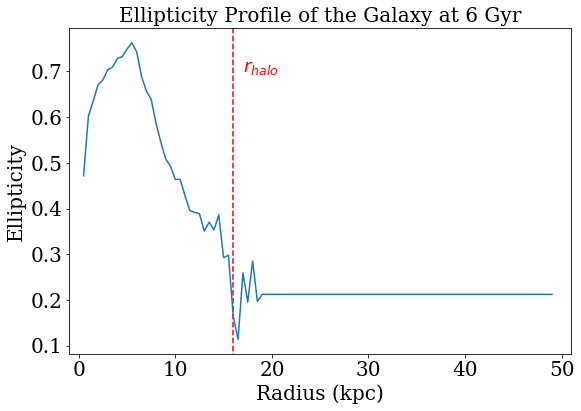

In [31]:
plt.figure(figsize=(9,6))

plt.plot(cata['col2']*resolve, ell)
plt.xlim([-1,51])
plt.ylim((plt.ylim()))
plt.vlines( x=r_3, ymin=0, ymax=0.8, colors='red', linestyle="--" )
plt.annotate('$r_{halo}$',  xy =( float(r_3)+1, 0.7), fontsize=18, color='red')
plt.title(r'Ellipticity Profile of the Galaxy at 6 Gyr',
          fontsize=20, family='serif', weight='ultralight')
plt.ylabel('Ellipticity',fontsize=20, family='serif', weight='ultralight')
plt.xlabel('Radius (kpc)',fontsize=20, family='serif', weight='ultralight')
plt.xticks(fontsize=20, family='serif')
plt.yticks(fontsize=20, family='serif')
plt.savefig('figs/ellipticity_694.png', dpi=400)
plt.show()

In [32]:
pic = obs[0].data.copy()

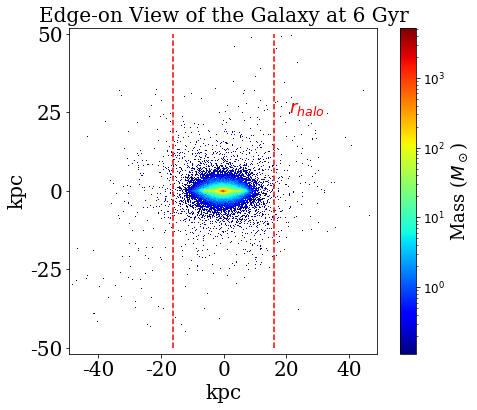

In [41]:
fig = plt.figure(figsize=(8,6))
gci = plt.imshow(pic, cmap='jet', origin='low', norm=matplotlib.colors.LogNorm())
plt.ylabel('kpc',fontsize=20, family='serif', weight='ultralight')
plt.xlabel('kpc',fontsize=20, family='serif', weight='ultralight')
plt.xticks(fontsize=15, family='serif')
plt.yticks(fontsize=15, family='serif')
#plt.ylim((plt.ylim()))
plt.ylim([-20,20+np.shape(pic)[0]])
line_position = [r_3/resolve + np.round(0.5*np.shape(pic)[1]),
                 -r_3/resolve + np.round(0.5*np.shape(pic)[1]),
                0, np.shape(pic)[0]]
plt.vlines( x=line_position[0], ymin=line_position[2], ymax=line_position[3],
           colors='red', linestyle="--" )
plt.vlines( x=line_position[1], ymin=line_position[2], ymax=line_position[3],
           colors='red', linestyle="--" )
plt.annotate(r'$r_{halo}$',  xy =(700, 750), fontsize=18, color='red')
cbar = plt.colorbar(gci)
cbar.set_label(label='Mass ($M_\odot$)', fontsize=18, family='serif', weight='ultralight')
cbar.ax.tick_params(labelsize='large')

#plt.colorbar(fraction=0.036, pad=0.04).set_label(label='Mass ($M_\odot$)',
#                                                  fontsize=18, family='serif', weight='ultralight')
# divide the axis to 5 pieces
ax=plt.gca()
stepx = np.floor(pic.shape[1]/4/ 5*resolve.to_value())* 5/resolve.to_value()
stepy = np.floor(pic.shape[0]/4/ 5*resolve.to_value())* 5/resolve.to_value()
ax.set_xticks(((np.arange(5)-2)*stepx + pic.shape[1]/2))  
ax.set_yticks(((np.arange(5)-2)*stepy + pic.shape[0]/2)) 
# set them to be multiple of 10 arcsec
ax.set_xticklabels(((np.arange(5)-2)*stepx*resolve.to_value()).astype('int').astype('str'),
                   fontsize=20, family='serif', weight='ultralight')
ax.set_yticklabels(((np.arange(5)-2)*stepy*resolve.to_value()).astype('int').astype('str'),
                   fontsize=20, family='serif', weight='ultralight')
plt.title('Edge-on View of the Galaxy at 6 Gyr', fontsize=20, family='serif', weight='ultralight')
plt.savefig('figs/All_stars_694.png', dpi=500, bbox_inches='tight')
plt.show()

In [42]:
def Density_and_Thick_Profile_2( x_field, xunits, y_field, yunits, z_field, zunits, n_bins ):
    import numpy as np
    xaxis   = yt.YTArray(np.zeros(n_bins), xunits)
    yaxis_t = yt.YTArray(np.zeros(n_bins), yunits)
    yaxis   = yt.YTArray(np.zeros(n_bins), yunits+'/'+xunits+'**2')
    zaxis_t = yt.YTArray(np.zeros((n_bins,n_bins)), yunits)
    zaxis   = yt.YTArray(np.zeros((n_bins,n_bins)), yunits+'/'+xunits+'**3')
    xstep   = r_3.in_units(xunits)  / n_bins
    zstep   = np.fabs(z_field).max() / n_bins
    locatex = locatez = 0;
        
    for jj in range(n_bins):# total mass profile
        booleanx = (x_field.in_units(xunits)>jj*xstep) & (x_field.in_units(xunits)<=(jj+1)*xstep)
        yaxis_t[jj] = ( y_field[booleanx].in_units(yunits) ).sum()
    
    for ii in range(n_bins):# radius and density profile
        xaxis[ii] = ii * xstep
        yaxis[ii] = yaxis_t[ii] / (C.pi*(2*ii+1)*xstep**2)
        zaxis[ii] = zaxis_t[ii] / (C.pi*(2*ii+1)*xstep**2) / (2*zstep)
    
    return([xaxis, yaxis, zaxis])

In [43]:
# 计算半径和恒星柱密度曲线
host_galaxy    = ds.disk(centerHost, norm_host, (50, "kpc"), (15, "kpc"))
r_cylindrical  = np.sqrt( (host_galaxy[('Stars', 'particle_position_relative_x')])**2 + (host_galaxy[('Stars', 'particle_position_relative_y')])**2 ).in_units('kpc')
[xaxis, yaxis, zaxis] = Density_and_Thick_Profile_2( r_cylindrical, 'kpc', host_galaxy[('Stars', 'particle_mass')], 'Msun', host_galaxy[('Stars', 'particle_position_relative_z')], 'kpc', 50 )
host_galaxy2    = ds.disk(centerHost, norm_host, (50, "kpc"), (2, "kpc"))
r_cylindrical2  = np.sqrt( (host_galaxy2[('Stars', 'particle_position_relative_x')])**2 + (host_galaxy2[('Stars', 'particle_position_relative_y')])**2 ).in_units('kpc')
[xaxis2, yaxis2, zaxis2] = Density_and_Thick_Profile_2( r_cylindrical2, 'kpc', host_galaxy2[('Stars', 'particle_mass')], 'Msun', host_galaxy2[('Stars', 'particle_position_relative_z')], 'kpc', 50 )

/home/protesticon/anaconda3/lib/python3.6/site-packages/yt/fields/derived_field.py:256: VisibleDeprecationWarning: The 'particle_position_relative' field has been deprecated in favor of 'relative_particle_position'.
  dd = self._function(self, data)


In [58]:
# 计算半径和恒星柱密度曲线
host_galaxy    = ds.disk(centerHost, norm_host, (50, "kpc"), (15, "kpc"))
r_cylindrical  = np.sqrt( (host_galaxy[('Stars', 'particle_position_relative_x')])**2 + (host_galaxy[('Stars', 'particle_position_relative_y')])**2 ).in_units('kpc')
[xaxis, yaxis, zaxis] = Density_and_Thick_Profile( r_cylindrical, 'kpc', host_galaxy[('Stars', 'particle_mass')], 'Msun', host_galaxy[('Stars', 'particle_position_relative_z')], 'kpc', 156 )
host_galaxy2    = ds.disk(centerHost, norm_host, (50, "kpc"), (2, "kpc"))
r_cylindrical2  = np.sqrt( (host_galaxy2[('Stars', 'particle_position_relative_x')])**2 + (host_galaxy2[('Stars', 'particle_position_relative_y')])**2 ).in_units('kpc')
[xaxis2, yaxis2, zaxis2] = Density_and_Thick_Profile_2( r_cylindrical2, 'kpc', host_galaxy2[('Stars', 'particle_mass')], 'Msun', host_galaxy2[('Stars', 'particle_position_relative_z')], 'kpc', 50 )

/home/protesticon/anaconda3/lib/python3.6/site-packages/yt/fields/derived_field.py:256: VisibleDeprecationWarning: The 'particle_position_relative' field has been deprecated in favor of 'relative_particle_position'.
  dd = self._function(self, data)


In [154]:
r_disc    = np.array( xaxis.in_units('kpc') )
dens_disc = np.array( yaxis.in_units('Msun/pc**2') )

smoothed_den = convolve(np.log10(dens_disc), Box1DKernel(2))
grad = np.gradient(np.gradient(smoothed_den))
grad = grad[(~np.isnan(grad)) & (~np.isinf(grad))]
for i in range(0,20):
    grad=grad[np.fabs(grad-grad.mean())<=3*np.std(grad,ddof=1)]
    #更新一维数组
    #迭代20次,输出是检查循环的进行 
sigma_profile = grad.std(ddof=1) * 1
'''
for i in range(len(np.gradient(np.gradient(smoothed_den)))):
    if np.fabs(np.gradient(np.gradient(smoothed_den)))[i]<=(sigma_profile) and\
        np.fabs(np.gradient(np.gradient(smoothed_den)))[i+1]<=(sigma_profile) and \
        np.fabs(np.gradient(np.gradient(smoothed_den)))[i+2]<=(sigma_profile) and \
        np.fabs(np.gradient(np.gradient(smoothed_den)))[i+3]<=(sigma_profile):
        break
'''
for i in range(len(np.gradient(np.gradient(smoothed_den)))):
    for j in range(9):
        if np.fabs(np.gradient(np.gradient(smoothed_den)))[i+j]>(sigma_profile):
            break
    if j >= 7:
        break

r_in0 = r_disc[i]
#r_in0 = res_robust0.x[4]#param_set[4]
print(r_in0)

for i in range(len(np.gradient(np.gradient(smoothed_den)))):
    for j in range(5):
        if (np.fabs(np.gradient(np.gradient(smoothed_den)))[-1-i-j]>(sigma_profile))\
            | np.isinf(np.fabs(np.gradient(np.gradient(smoothed_den)))[-1-i-j]) \
            | np.isnan(np.fabs(np.gradient(np.gradient(smoothed_den)))[-1-i-j]):
            break
    if j >= 1:
        break

r_out0 = r_disc[-1-i]

for i in range(len(np.gradient(np.gradient(smoothed_den)))-1):
    if (i<len(smoothed_den)-1) & (dens_disc[i] < dens_disc[i+1]) & (r_disc[i]>r_in0):
        break
#r_out0 = np.min([r_out0, r_disc[i]])

#r_out = 16#13.5#r_disc[dens_disc > 4e-2][-1]
print(r_out0)


param_set, param_cov = curve_fit(I_fit, xdata = r_disc[(r_disc>=r_in0)&(r_disc<=r_out0)&(dens_disc!=0)],
                                 ydata = np.log10(dens_disc)[(r_disc>=r_in0)&(r_disc<=r_out0)&(dens_disc!=0)],
                                 #sigma = err_disc[(r_disc>=r_in)&(r_disc<=r_out)&(dens_disc!=0)],
                                 bounds=([0,0.1,0,0,r_in0], [np.inf,1,np.inf,np.inf,r_out0]),
                                p0=[1,0.5,1,1,0.5*(min(r_disc)+max(r_disc))], maxfev = 1000000)

if (param_set[2]/param_set[3] > 1.1) or (param_set[2]/param_set[3] < 1/1.1) and (r_in0+0.5<=param_set[4]):
    r_break0 = param_set[4]
else:
    r_break0 = np.nan
oiratio0 = param_set[2]/param_set[3]
print(param_set)

from scipy.optimize import least_squares


def I_rob(param_set, r, y):
    S, alpha, beta, gamma, r_b = param_set.tolist()
    return np.log10(S * np.exp(-1 * r / gamma) *
                    (1 + np.exp(alpha *
                                (r - r_b)))**(1 / alpha *
                                              (1 / gamma - 1 / beta))) - y


res_robust0 = least_squares(
    I_rob,
    param_set,
    loss='soft_l1',
    f_scale=0.2,
    args=(r_disc[(r_disc >= r_in0) & (r_disc <= r_out0) & (dens_disc != 0)],
          np.log10(dens_disc)[(r_disc >= r_in0) & (r_disc <= r_out0) &
                              (dens_disc != 0)]),
    bounds=([0,0.1,0,0,r_in0], [np.inf,1,np.inf,np.inf,r_out0]))
if res_robust0.success == True:
    r_break0 = (res_robust0.x)[4]
    oiratio0 = (res_robust0.x)[2] / (res_robust0.x)[3]
res_robust0.x, res_robust0.success, oiratio0

1.9230769230769234
47.11538461538462
[2.40727580e+03 3.84110015e-01 7.55440600e+00 1.60555387e+00
 1.56570859e+01]


(array([2.39311041e+03, 3.72632198e-01, 7.60845561e+00, 1.59811879e+00,
        1.55878644e+01]), True, 4.76088240577045)

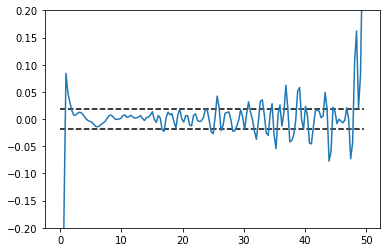

In [155]:
plt.plot(r_disc, np.gradient(np.gradient(smoothed_den)))
plt.hlines( sigma_profile, xmin=0, xmax=r_disc.max(), linestyles='dashed')
plt.hlines(-sigma_profile, xmin=0, xmax=r_disc.max(), linestyles='dashed')
plt.ylim([-0.2,0.2]);

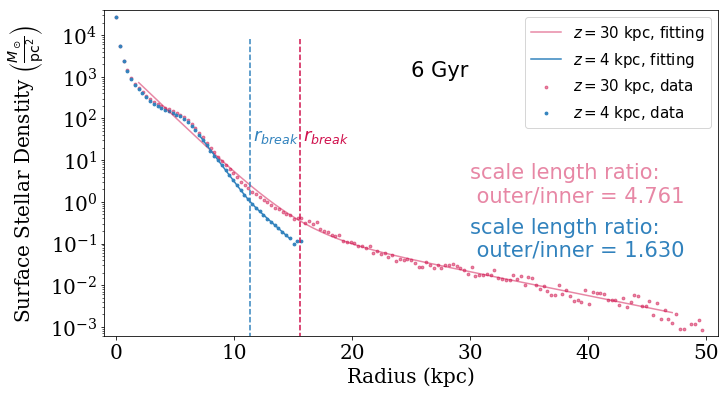

In [156]:
# density profile
plt.figure(figsize=(11, 6))
plt.scatter(xaxis.in_units('kpc'),
            yaxis.in_units('Msun/pc**2'),
            label='$z=30\ \mathrm{kpc}$, data',
            color='#D0104C',
            alpha=0.5,
            s=8)
plt.scatter(xaxis2.in_units('kpc'),
            yaxis2.in_units('Msun/pc**2'),
            label='$z=4\ \mathrm{kpc}$, data',
            color='#3182bd',
            s=8)

plt.plot(r_disc[(r_disc >= r_in0) & (r_disc <= r_out0)],
         I_show(np.array(r_disc[(r_disc >= r_in0) & (r_disc <= r_out0)]),
                res_robust0.x),
         label='$z=30\ \mathrm{kpc}$, fitting',
         color='#D0104C',
         alpha=0.5)
plt.plot(np.ones(5) * r_break0,
         np.arange(5) * 2e3,
         color='#D0104C',
         linestyle="--")

plt.plot(r_disc[(r_disc >= r_in2) & (r_disc <= r_out2)],
         I_show(np.array(r_disc[(r_disc >= r_in2) & (r_disc <= r_out2)]),
                res_robust2.x),
         label='$z=4\ \mathrm{kpc}$, fitting',
         color='#3182bd')
plt.plot(np.ones(5) * r_break2,
         np.arange(5) * 2e3,
         color='#3182bd',
         linestyle="--")


plt.yscale('log')
plt.ylabel(
    r'Surface Stellar Denstity $\left(\frac{M_\odot}{\rm{pc}^2}\right)$',
    fontsize=20,
    family='serif',
    weight='ultralight')
plt.xlabel('Radius (kpc)', fontsize=20, family='serif', weight='ultralight')
plt.xticks(fontsize=20, family='serif')
plt.yticks(fontsize=20, family='serif')

plt.annotate('$r_{break}$',
             xy=(float(r_break0)+0.25, 3e1),
             fontsize=18,
             color='#D0104C')

plt.annotate('$r_{break}$',
             xy=(float(r_break2)+0.25, 3e1),
             fontsize=18,
             color='#3182bd')
plt.annotate('scale length ratio: \n outer/inner = %.3f' % oiratio0,
             xy=(30, 1e0),
             fontsize=21,
             color='#D0104C',
             alpha=0.5)
plt.annotate('scale length ratio: \n outer/inner = %.3f' % oiratio2,
             xy=(30, 5e-2),
             fontsize=21,
             color='#3182bd')

plt.annotate('6 Gyr', xy=(25, 1e3), fontsize=21)
plt.xlim([-1, 51])
plt.ylim([6e-4, 4e4])
plt.legend(fontsize=15,loc=1)
plt.savefig('figs/height&radius_compare/694_0600_z&r_pro6.png', dpi=400)

In [153]:
from astropy.convolution import convolve, Box1DKernel
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

def I_fit(r,S,alpha,beta,gamma,r_b):
    return  np.log10(S * np.exp(-1*r/gamma) * ( 1 + np.exp( alpha*(r-r_b) ) )**( 1/alpha * ( 1/gamma - 1/beta ) ) )

def I_show(r,param_set):
    S,alpha,beta,gamma,r_b = param_set.tolist()
    return  S * np.exp(-1*r/gamma) * ( 1 + np.exp( alpha*(r-r_b) ) )**( 1/alpha * ( 1/gamma - 1/beta ) ) 

r_disc    = np.array( xaxis2.in_units('kpc') )
dens_disc = np.array( yaxis2.in_units('Msun/pc**2') )

smoothed_den = convolve(np.log10(dens_disc), Box1DKernel(2))
grad = np.gradient(np.gradient(smoothed_den))
grad = grad[(~np.isnan(grad)) & (~np.isinf(grad))]
for i in range(0,20):
    grad=grad[np.fabs(grad-grad.mean())<=3*np.std(grad,ddof=1)]
    #更新一维数组
    #迭代20次,输出是检查循环的进行 
sigma_profile = grad.std(ddof=1) * 1
'''
for i in range(len(np.gradient(np.gradient(smoothed_den)))):
    if np.fabs(np.gradient(np.gradient(smoothed_den)))[i]<=(sigma_profile) and\
        np.fabs(np.gradient(np.gradient(smoothed_den)))[i+1]<=(sigma_profile) and \
        np.fabs(np.gradient(np.gradient(smoothed_den)))[i+2]<=(sigma_profile) and \
        np.fabs(np.gradient(np.gradient(smoothed_den)))[i+3]<=(sigma_profile):
        break
'''
for i in range(len(np.gradient(np.gradient(smoothed_den)))):
    for j in range(9):
        if np.fabs(np.gradient(np.gradient(smoothed_den)))[i+j]>(sigma_profile):
            break
    if j >= 7:
        break

r_in2 = np.array(xaxis[i].in_units('kpc'))
#r_in = res_robust.x[4]#param_set[4]
print(r_in2)

for i in range(len(np.gradient(np.gradient(smoothed_den)))):
    for j in range(5):
        if (np.fabs(np.gradient(np.gradient(smoothed_den)))[-1-i-j]>(sigma_profile))\
            | np.isinf(np.fabs(np.gradient(np.gradient(smoothed_den)))[-1-i-j]) \
            | np.isnan(np.fabs(np.gradient(np.gradient(smoothed_den)))[-1-i-j]):
            break
    if j >= 3:
        break

r_out2 = np.array(xaxis[-1-i].in_units('kpc'))

for i in range(len(np.gradient(np.gradient(smoothed_den)))-1):
    if (i<len(smoothed_den)-1) & (dens_disc[i] < dens_disc[i+1]) & (r_disc[i]>r_in2):
        break
r_out2 = np.min([r_out2, r_disc[i]])

#r_out = 16#13.5#r_disc[dens_disc > 4e-2][-1]
print(r_out2)


param_set, param_cov = curve_fit(I_fit, xdata = r_disc[(r_disc>=r_in2)&(r_disc<=r_out2)&(dens_disc!=0)],
                                 ydata = np.log10(dens_disc)[(r_disc>=r_in2)&(r_disc<=r_out2)&(dens_disc!=0)],
                                 #sigma = err_disc[(r_disc>=r_in)&(r_disc<=r_out)&(dens_disc!=0)],
                                 bounds=([0,0.1,0,0,r_in2], [np.inf,1,np.inf,np.inf,r_out2]),
                                p0=[1,0.5,1,1,0.5*(min(r_disc)+max(r_disc))],maxfev = 1000000)

if (param_set[2]/param_set[3] > 1.1) or (param_set[2]/param_set[3] < 1/1.1) and (r_in2+0.5<=param_set[4]):
    r_break2 = param_set[4]
else:
    r_break2 = np.nan
oiratio2 = param_set[2]/param_set[3]
print(param_set)

7.051282051282052
15.040000000000001
[2.38517268e+04 1.00000000e+00 1.80192334e+00 1.10553427e+00
 1.13512889e+01]


In [33]:
r_disc    = np.array( xaxis.in_units('kpc') )
dens_disc = np.array( yaxis.in_units('Msun/pc**2') )

smoothed_den = convolve(np.log10(dens_disc), Box1DKernel(2))
grad = np.gradient(np.gradient(smoothed_den))
grad = grad[(~np.isnan(grad)) & (~np.isinf(grad))]
for i in range(0,20):
    grad=grad[np.fabs(grad-grad.mean())<=3*np.std(grad,ddof=1)]
    #更新一维数组
    #迭代20次,输出是检查循环的进行 
sigma_profile = grad.std(ddof=1) * 1
'''
for i in range(len(np.gradient(np.gradient(smoothed_den)))):
    if np.fabs(np.gradient(np.gradient(smoothed_den)))[i]<=(sigma_profile) and\
        np.fabs(np.gradient(np.gradient(smoothed_den)))[i+1]<=(sigma_profile) and \
        np.fabs(np.gradient(np.gradient(smoothed_den)))[i+2]<=(sigma_profile) and \
        np.fabs(np.gradient(np.gradient(smoothed_den)))[i+3]<=(sigma_profile):
        break
'''
for i in range(len(np.gradient(np.gradient(smoothed_den)))):
    for j in range(9):
        if np.fabs(np.gradient(np.gradient(smoothed_den)))[i+j]>(sigma_profile):
            break
    if j >= 5:
        break

r_in0 = np.array(xaxis[i].in_units('kpc'))
#r_in0 = res_robust0.x[4]#param_set[4]
print(r_in0)

for i in range(len(np.gradient(np.gradient(smoothed_den)))):
    for j in range(5):
        if (np.fabs(np.gradient(np.gradient(smoothed_den)))[-1-i-j]>(sigma_profile))\
            | np.isinf(np.fabs(np.gradient(np.gradient(smoothed_den)))[-1-i-j]) \
            | np.isnan(np.fabs(np.gradient(np.gradient(smoothed_den)))[-1-i-j]):
            break
    if j >= 3:
        break

r_out0 = np.array(xaxis[-1-i].in_units('kpc'))

for i in range(len(np.gradient(np.gradient(smoothed_den)))-1):
    if (i<len(smoothed_den)-1) & (dens_disc[i] < dens_disc[i+1]) & (r_disc[i]>r_in0):
        break
r_out0 = np.min([r_out0, r_disc[i]])

#r_out = 16#13.5#r_disc[dens_disc > 4e-2][-1]
print(r_out0)


param_set, param_cov = curve_fit(I_fit, xdata = r_disc[(r_disc>=r_in0)&(r_disc<=r_out0)&(dens_disc!=0)],
                                 ydata = np.log10(dens_disc)[(r_disc>=r_in0)&(r_disc<=r_out0)&(dens_disc!=0)],
                                 #sigma = err_disc[(r_disc>=r_in)&(r_disc<=r_out)&(dens_disc!=0)],
                                 bounds=([0,0.1,0,0,r_in0], [np.inf,1,np.inf,np.inf,r_out0]),
                                p0=[1,0.5,1,1,0.5*(min(r_disc)+max(r_disc))], maxfev = 1000000)

if (param_set[2]/param_set[3] > 1.1) or (param_set[2]/param_set[3] < 1/1.1) and (r_in0+0.5<=param_set[4]):
    r_break0 = param_set[4]
else:
    r_break0 = np.nan
oiratio0 = param_set[2]/param_set[3]
print(param_set)

3.84
14.4
[570.88064312   1.           1.54243216   6.55047355   3.84      ]


In [34]:
from scipy.optimize import least_squares


def I_rob(param_set, r, y):
    S, alpha, beta, gamma, r_b = param_set.tolist()
    return np.log10(S * np.exp(-1 * r / gamma) *
                    (1 + np.exp(alpha *
                                (r - r_b)))**(1 / alpha *
                                              (1 / gamma - 1 / beta))) - y


res_robust2 = least_squares(
    I_rob,
    param_set,
    loss='soft_l1',
    f_scale=0.2,
    args=(r_disc[(r_disc >= r_in2) & (r_disc <= r_out2) & (dens_disc != 0)],
          np.log10(dens_disc)[(r_disc >= r_in2) & (r_disc <= r_out2) &
                              (dens_disc != 0)]))
if res_robust2.success == True:
    r_break2 = (res_robust2.x)[4]
    oiratio2 = (res_robust2.x)[2] / (res_robust2.x)[3]
res_robust2.x, res_robust2.success, oiratio2

(array([570.88642449,   5.35246593,   1.63660851,   6.79920569,
          3.13320786]), True, 0.24070583943721194)

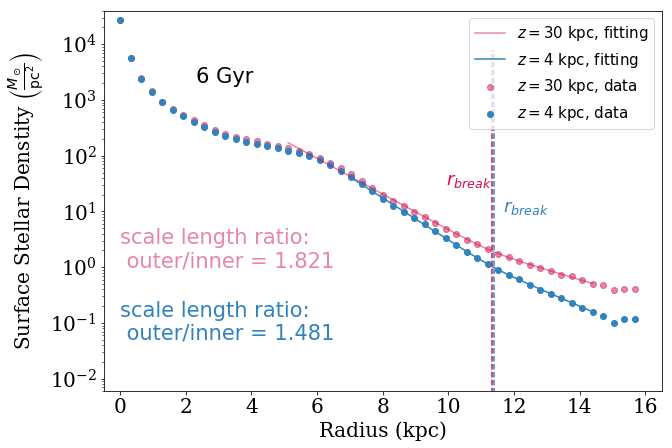

In [87]:
# density profile
plt.figure(figsize=(10, 7))
plt.scatter(xaxis.in_units('kpc'),
            yaxis.in_units('Msun/pc**2'),
            label='$z=30\ \mathrm{kpc}$, data',
            color='#D0104C',
            alpha=0.5)
plt.scatter(xaxis2.in_units('kpc'),
            yaxis2.in_units('Msun/pc**2'),
            label='$z=4\ \mathrm{kpc}$, data',
            color='#3182bd')
plt.plot(r_disc[(r_disc >= r_in0) & (r_disc <= r_out0)],
         I_show(np.array(r_disc[(r_disc >= r_in0) & (r_disc <= r_out0)]),
                res_robust0.x),
         label='$z=30\ \mathrm{kpc}$, fitting',
         color='#D0104C',
         alpha=0.5)
plt.plot(r_disc[(r_disc >= r_in2) & (r_disc <= r_out2)],
         I_show(np.array(r_disc[(r_disc >= r_in2) & (r_disc <= r_out2)]),
                res_robust2.x),
         label='$z=4\ \mathrm{kpc}$, fitting',
         color='#3182bd')
plt.plot(np.ones(5) * r_break2,
         np.arange(5) * 2e3,
         color='#3182bd',
         linestyle="--")
plt.plot(np.ones(5) * r_break0,
         np.arange(5) * 2e3,
         color='#D0104C',
         linestyle="--")

plt.yscale('log')
plt.ylabel(
    r'Surface Stellar Denstity $\left(\frac{M_\odot}{\rm{pc}^2}\right)$',
    fontsize=20,
    family='serif',
    weight='ultralight')
plt.xlabel('Radius (kpc)', fontsize=20, family='serif', weight='ultralight')
plt.xticks(fontsize=20, family='serif')
plt.yticks(fontsize=20, family='serif')
plt.annotate('$r_{break}$',
             xy=(float(r_break2) + 0.25, 1e1),
             fontsize=18,
             color='#3182bd')
plt.annotate('$r_{break}$',
             xy=(float(r_break0) - 1.4, 3e1),
             fontsize=18,
             color='#D0104C')
plt.annotate('scale length ratio: \n outer/inner = %.3f' % oiratio0,
             xy=(0, 1e0),
             fontsize=21,
             color='#D0104C',
             alpha=0.5)
plt.annotate('scale length ratio: \n outer/inner = %.3f' % oiratio2,
             xy=(0, 5e-2),
             fontsize=21,
             color='#3182bd')
plt.annotate('6 Gyr', xy=(2.3, 2e3), fontsize=21)
plt.xlim([-0.5, r_3.base + 0.5])
plt.ylim([6e-3, 4e4])
plt.legend(fontsize=15,loc=1)
plt.savefig('figs/height&radius_compare/694_0600_z_pro6.png', dpi=400)

In [32]:
import collections
print([item for item, count in collections.Counter(np.array(ds.all_data()[('Stars', 'iord')])).items() if count > 1])
#You see, no repetition in ('Stars', 'iord')

[]


In [89]:
host_galaxy    = ds.disk(centerHost, norm_host, (50, "kpc"), (15, "kpc"))
r_cylindrical  = np.sqrt( (host_galaxy[('Stars', 'particle_position_relative_x')])**2 +\
                         (host_galaxy[('Stars', 'particle_position_relative_y')])**2 ).in_units('kpc')
ID1 = np.array(host_galaxy[('Stars', 'iord')][r_cylindrical<=r_1])
ID2 = np.array(host_galaxy[('Stars', 'iord')][(r_cylindrical>r_1) & (r_cylindrical<=r_2)])
ID3 = np.array(host_galaxy[('Stars', 'iord')][(r_cylindrical>r_2)])
all_ID = np.array(ds.all_data()[('Stars', 'iord')])
#del r_cylindrical#删掉辅助的柱坐标半径变量

In [90]:
index = np.zeros((3,len(all_ID)),bool)
index[0] = np.isin(all_ID, ID1)
index[1] = np.isin(all_ID, ID2)
index[2] = np.isin(all_ID, ID3)
del ID1, ID2, ID3, all_ID, index

In [91]:
time = yt.YTArray((np.arange(10)+1), 'Gyr')
# (3,10) is not natural with logic, but convenient to plot
radius_mean    = yt.YTArray((np.zeros((3,10))), 'kpc')
radius_scatter = yt.YTArray((np.zeros((3,10))), 'kpc')
radius_percent = yt.YTArray((np.zeros((3,2,10))), 'kpc')

In [24]:
# 定义平均意义下的密度计算函数，返回值是两个数组，x 量被划分为多个区间，y 量在对应的区间内被平均
def Density_and_Thick_Profile( x_field, xunits, y_field, yunits, z_field, zunits, n_bins ):
    import numpy as np
    xaxis   = yt.YTArray(np.zeros(n_bins), xunits)
    yaxis_t = yt.YTArray(np.zeros(n_bins), yunits)
    yaxis   = yt.YTArray(np.zeros(n_bins), yunits+'/'+xunits+'**2')
    zaxis_t = yt.YTArray(np.zeros((n_bins,n_bins)), yunits)
    zaxis   = yt.YTArray(np.zeros((n_bins,n_bins)), yunits+'/'+xunits+'**3')
    xstep   = (r_3).in_units(xunits)  / n_bins
    zstep   = np.fabs(z_field).max() / n_bins
    locatex = locatez = 0;
        
    for jj in range(n_bins):# total mass profile
        booleanx = (x_field.in_units(xunits)>jj*xstep) & (x_field.in_units(xunits)<=(jj+1)*xstep)
        yaxis_t[jj] = ( y_field[booleanx].in_units(yunits) ).sum()
    
    for ii in range(n_bins):# radius and density profile
        xaxis[ii] = ii * xstep
        yaxis[ii] = yaxis_t[ii] / (C.pi*(2*ii+1)*xstep**2)
        zaxis[ii] = zaxis_t[ii] / (C.pi*(2*ii+1)*xstep**2) / (2*zstep)
    
    return([xaxis, yaxis, zaxis])

def Age_profile( x_field, xunits, y_field, yunits, z_field, zunits, n_bins ):
    import numpy as np
    xaxis   = yt.YTArray(np.zeros(n_bins), xunits)
    yaxis_t = yt.YTArray(np.zeros(n_bins), yunits+'*'+zunits)
    yaxis   = yt.YTArray(np.zeros(n_bins), yunits)
    zaxis_t = yt.YTArray(np.zeros((n_bins)), zunits)
    xstep   = (r_3).in_units(xunits)  / n_bins
    locatex = 0;
        
    for jj in range(n_bins):# total mass profile
        boolean = (x_field.in_units(xunits)>jj*xstep) & (x_field.in_units(xunits)<=(jj+1)*xstep)
        # evrey radius bin, weighted by mass of stars
        yaxis_t[jj] = (y_field[boolean].in_units(yunits) * z_field[boolean].in_units(zunits)).sum()
        zaxis_t[jj] = z_field[boolean].sum().in_units(zunits)
    for ii in range(n_bins):# radius and density profile
        xaxis[ii] = ii * xstep
        yaxis[ii] = yaxis_t[ii] / zaxis_t[ii]
    
    return([xaxis, yaxis])

In [26]:
def Profiles(ds_list):
    stellar_profiles = yt.YTArray(np.zeros((len(ds_list),bins)), 'Msun/kpc**2')
    for ii in range(len(ds_list)):
        ds = ds_list[ii]
        density = ds.all_data()[('Gas', 'Density')]
        target  = np.where(density == density.max())[0][0]
        del density
        centerHost = ds.all_data()[('Gas', 'Coordinates')][target].in_units('kpc')
        sphHost0 = ds.sphere(centerHost, (20, 'kpc')) 
        centerHost = sphHost0.quantities.center_of_mass(use_gas=False, use_particles=True, particle_type='Stars')
        sphHost1 = ds.sphere(centerHost, (20, 'kpc'))
        sphHost_4_norm = ds.sphere(centerHost, (4, 'kpc'))
        #计算 host 的角动量，作为其法线方向，再算出与法向量垂直的一个向量，当做画图时的北方
        norm_host  = sphHost_4_norm.quantities.angular_momentum_vector(use_gas=False, use_particles=True, particle_type='Stars')
        north_host = yt.YTArray(yt.ortho_find(norm_host), 'kpc')[1]
        # 计算半径和恒星柱密度曲线
        host_galaxy    = ds.disk(centerHost, norm_host, r_3, t_height/2)
        r_cylindrical  = np.sqrt( (host_galaxy[('Stars', 'particle_position_relative_x')])**2 + (host_galaxy[('Stars', 'particle_position_relative_y')])**2 ).in_units('kpc')
        [xaxis, yaxis, zaxis] = Density_and_Thick_Profile_2( r_cylindrical, 'kpc', host_galaxy[('Stars', 'particle_mass')], 'Msun', host_galaxy[('Stars', 'particle_position_relative_z')], 'kpc', bins )
        stellar_profiles[ii] = yaxis
    return [xaxis, stellar_profiles]
bins = 50
[xaxis, profiles] = Profiles(ds_array)

In [27]:
%store profiles

Stored 'profiles' (YTArray)


In [28]:
def Age_Profiles(ds_list):
    stellar_profiles = yt.YTArray(np.zeros((len(ds_list),bins)), 'Gyr')
    for ii in range(len(ds_list)):
        ds = ds_list[ii]
        density = ds.all_data()[('Gas', 'Density')]
        target  = np.where(density == density.max())[0][0]
        del density
        centerHost = ds.all_data()[('Gas', 'Coordinates')][target].in_units('kpc')
        sphHost0 = ds.sphere(centerHost, (20, 'kpc')) 
        centerHost = sphHost0.quantities.center_of_mass(use_gas=False, use_particles=True, particle_type='Stars')
        sphHost1 = ds.sphere(centerHost, (20, 'kpc'))
        sphHost_4_norm = ds.sphere(centerHost, (4, 'kpc'))
        #计算 host 的角动量，作为其法线方向，再算出与法向量垂直的一个向量，当做画图时的北方
        norm_host  = sphHost_4_norm.quantities.angular_momentum_vector(use_gas=False, use_particles=True, particle_type='Stars')
        north_host = yt.YTArray(yt.ortho_find(norm_host), 'kpc')[1]
        # 计算半径和恒星柱密度曲线
        host_galaxy     = ds.disk(centerHost, norm_host, (50, "kpc"), (15, "kpc"))
        r_cylindrical   = np.sqrt( (host_galaxy[('Stars', 'particle_position_relative_x')])**2 + (host_galaxy[('Stars', 'particle_position_relative_y')])**2 ).in_units('kpc')
        [radius, yaxis] = Age_profile(r_cylindrical, 'kpc', host_galaxy[('Stars', 'FormationTime')], 'Gyr',host_galaxy[('Stars', 'Mass')], 'Msun', bins)
        stellar_profiles[ii] = yaxis
        
    return [radius, stellar_profiles]

[xaxis, age_profiles] = Age_Profiles(ds_array)

/home/protesticon/anaconda3/lib/python3.6/site-packages/yt/units/yt_array.py:1394: RuntimeWarning: invalid value encountered in true_divide
  out=out, **kwargs)


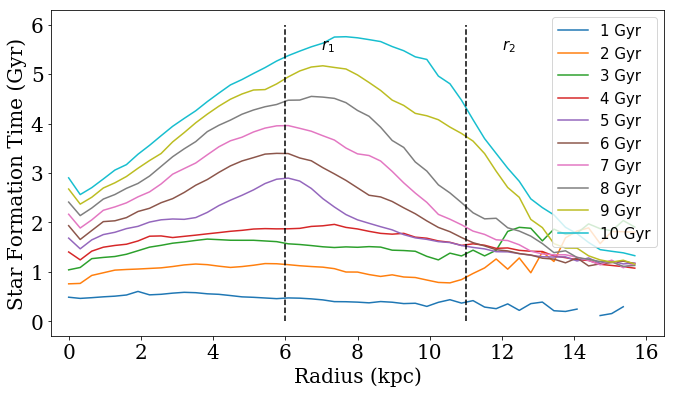

In [29]:
# density profile
plt.figure(figsize=(11,6))
for ii in range(len(age_profiles)):
    plt.plot(xaxis.in_units('kpc'),age_profiles[ii].in_units('Gyr'),
             label=str(ii+1)+' Gyr')
plt.plot(np.ones(5)*r_1, np.arange(5)*1.5,color='black',linestyle="--")
plt.plot(np.ones(5)*r_2, np.arange(5)*1.5,color='black',linestyle="--")


plt.ylabel(r'Star Formation Time (Gyr)',fontsize=20, family='serif', weight='ultralight')
plt.xlabel('Radius (kpc)',fontsize=20, family='serif', weight='ultralight')
plt.xticks(fontsize=20, family='serif')
plt.yticks(fontsize=20, family='serif')
plt.xlim([-0.5,r_3.base+0.5])
plt.annotate('$r_1$', xy =( float(r_1)+1, 5.5), fontsize=15 )
plt.annotate('$r_2$', xy =( float(r_2)+1, 5.5), fontsize=15 )
plt.legend(fontsize=15);
#plt.savefig('694_age_profiles.png',dpi=400)

In [97]:
for ds in ds_array:
    print(len(ds.all_data()[('Stars', 'Mass')]))

546149
947629
1208602
1395533
1595107
1786919
1960598
2123535
2268279
2395697


In [99]:
ds = ds_array[5]

In [100]:
fraction = {}
fraction['dwarf']   = np.zeros(3)
fraction['SF']      = np.zeros(3)
fraction['migrate'] = np.zeros(3)

In [101]:
# Which stars are from dwarf
index_dwarf_prime  = np.zeros((3,len(ds.all_data()['Stars', 'Mass'])), bool)
center_array       = [[35., 0., 143.], [-35., 0.0, -5/8*25], [45., 2., 6.]]
for ii in range(len(center_array)):
    centerDwarf  = yt.YTArray(center_array[ii], 'kpc')
    sphDwarf     = ds_array[ii].sphere(centerDwarf, (10, 'kpc')) 
    centerDwarf  = sphDwarf.quantities.center_of_mass(use_gas=False, use_particles=True, particle_type='Stars')
    sphDwarf     = ds_array[ii].sphere(centerDwarf, (10, 'kpc')) 
    index_dwarf_prime[ii] = np.append(np.isin(ds_array[ii].all_data()['Stars', 'iord'], sphDwarf['Stars', 'iord']),
                                      np.zeros(len(ds.all_data()['Stars', 'iord'])-len(ds_array[ii].all_data()['Stars', 'iord']), bool))

index_dwarf = index_dwarf_prime[0] | index_dwarf_prime[1] | index_dwarf_prime[2]
del index_dwarf_prime

# Calculate mass fraction of dwarf's stars
#for ii in range(len(fraction['dwarf'])):
    #fraction['dwarf'][ii] = ds_array[-1].all_data()['Stars', 'Mass'][(index_dwarf & index[ii])].sum() / ds_array[-1].all_data()['Stars', 'Mass'][index[ii]].sum()

In [102]:
# Which stars are from host
index_host_prime = np.zeros((3,len(ds.all_data()['Stars', 'Mass'])), bool)
for ii in range(len(center_array)):
    density = ds_array[ii].all_data()[('Gas', 'Density')]
    target  = np.where(density == density.max())[0][0]
    del density
    centerHost = ds_array[ii].all_data()[('Gas', 'Coordinates')][target].in_units('kpc')
    sphHost0 = ds_array[ii].sphere(centerHost, (20, 'kpc')) 
    centerHost = sphHost0.quantities.center_of_mass(use_gas=False, use_particles=True, particle_type='Stars')
    sphHost1 = ds_array[ii].sphere(centerHost, (20, 'kpc'))
    sphHost_4_norm = ds_array[ii].sphere(centerHost, (4, 'kpc'))
    #计算 host 的角动量，作为其法线方向，再算出与法向量垂直的一个向量，当做画图时的北方
    norm_host  = sphHost_4_norm.quantities.angular_momentum_vector(use_gas=False, use_particles=True, particle_type='Stars')
    north_host = yt.YTArray(yt.ortho_find(norm_host), 'kpc')[1]
    disHost    = ds_array[ii].disk(centerHost, norm_host, (50, "kpc"), (10, "kpc"))
    index_host_prime[ii] = np.append(np.isin(ds_array[ii].all_data()['Stars', 'iord'], disHost['Stars', 'iord']),
                                      np.zeros(len(ds.all_data()['Stars', 'iord'])-len(ds_array[ii].all_data()['Stars', 'iord']), bool))

index_host = index_host_prime[0] | index_host_prime[1] | index_host_prime[2]
del index_host_prime

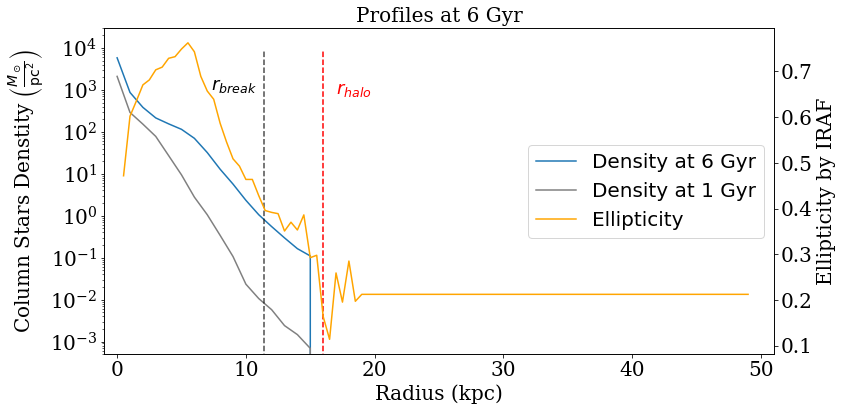

In [123]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(111)
p1, = ax1.plot(xaxis.in_units('kpc'),profiles[5].in_units('Msun/pc**2'),  label='Density at 6 Gyr')#color='#33A6B8',
p2, = ax1.plot(xaxis.in_units('kpc'),profiles[0].in_units('Msun/pc**2'), color='grey', label='Density at 1 Gyr')
#plt.plot(np.ones(2)*r_break, np.arange(2)*0.7e4, color='black',linestyle="--", alpha=0.7)
plt.annotate('$r_{break}$', xy =( float(r_break2)-4.1, 1e3), fontsize=18 )
ax1.set_xlim([-1,51])
plt.ylim([5e-4,3e4]);
ax1.set_ylabel(r'Column Stars Denstity $\left(\frac{M_\odot}{\rm{pc}^2}\right)$',
               fontsize=20, family='serif', weight='ultralight')
ax1.set_xlabel('Radius (kpc)',fontsize=20, family='serif', weight='ultralight')
ax1.set_yscale('log')
ax1.tick_params(axis='x', labelsize=20)
plt.title(r'Profiles at 6 Gyr',
          fontsize=20, family='serif', weight='ultralight')
plt.xticks(fontsize=20, family='serif')
plt.yticks(fontsize=20, family='serif')
#ax1.legend(fontsize=20,loc=4)


ax2 = ax1.twinx()  # this is the important function
p3, = ax2.plot(cata['col2']*resolve, ell, color='orange', label='Ellipticity')
ax2.set_ylim((ax2.set_ylim()))
ax2.set_ylabel(r'Ellipticity by IRAF',fontsize=20, family='serif', weight='ultralight')
ax2.vlines( x=r_3, ymin=0, ymax=0.745, colors='red', linestyle="--" )
ax2.vlines( x=r_break2, ymin=0, ymax=0.745, color='black',linestyle="--", alpha=0.7)
ax2.annotate('$r_{halo}$',  xy =( float(r_3)+1, 0.65), fontsize=18, color='red')
#ax2.plot(np.ones(4)*r_1, np.arange(4)+2.1,color='black',linestyle="--")
#ax2.plot(np.ones(4)*r_2, np.arange(4)+2.1,color='black',linestyle="--")
#ax2.annotate('$r_1$', xy =( float(r_1)+1, 3.7), fontsize=18 )
#ax2.annotate('$r_2$', xy =( float(r_2)+1, 3.7), fontsize=18 )
plt.yticks(fontsize=20, family='serif')

#ax2.legend(fontsize=20,loc=1)

ax1.legend([p1,p2,p3], [l.get_label() for l in [p1,p2,p3]], fontsize=20, loc=5)

plt.savefig('figs/694_profiles.png',dpi=400)

plt.show()

In [124]:
DiningHall = ['Nongyuan', 'Yannan', 'Study5', 'WhiteHouse', 'Study1', 'Yiyuan', 'Shaoyuan']
print(DiningHall[np.random.randint(0,len(DiningHall))])

Yiyuan


In [125]:
def Fractions( radius, runits, y_field, yunits,  n_bins, index ):
    import numpy as np
    xaxis   = yt.YTArray(np.zeros(n_bins), runits)
    yaxis   = yt.YTArray(np.zeros(n_bins))
    xstep   = radius.max().in_units(runits) / n_bins
    
    index_new = np.isin( host_galaxy['Stars', 'iord'], 
                        ds.all_data()['Stars', 'iord'][index] )
    
    
    for jj in range(n_bins):# total mass profile
        booleanx = (radius.in_units(runits)>jj*xstep) & (radius.in_units(runits)<=(jj+1)*xstep)
        yaxis[jj] = ( y_field[ booleanx & index_new ].in_units(yunits) ).sum() \
                    / ( y_field[ booleanx ].in_units(yunits) ).sum()
        xaxis[jj] = jj * xstep
    
    return([xaxis, yaxis])

In [126]:
host_galaxy    = ds.disk(centerHost, norm_host, (50, "kpc"), (4, "kpc"))
r_cylindrical  = np.sqrt( (host_galaxy[('Stars', 'particle_position_relative_x')])**2 \
                         + (host_galaxy[('Stars', 'particle_position_relative_y')])**2 ).in_units('kpc')
xaxis, frac_dwa = Fractions( r_cylindrical, 'kpc', 
                            host_galaxy[('Stars', 'Mass')], 'Msun', 150, index_dwarf )
#xaxis, frac_hie = Fractions( r_cylindrical, 'kpc',
                            #host_galaxy[('Stars', 'Mass')], 'Msun', bins, index_dwarf )
#xaxis, frac_loe = Fractions( r_cylindrical, 'kpc',
                            #host_galaxy[('Stars', 'Mass')], 'Msun', bins, index_dwarf )

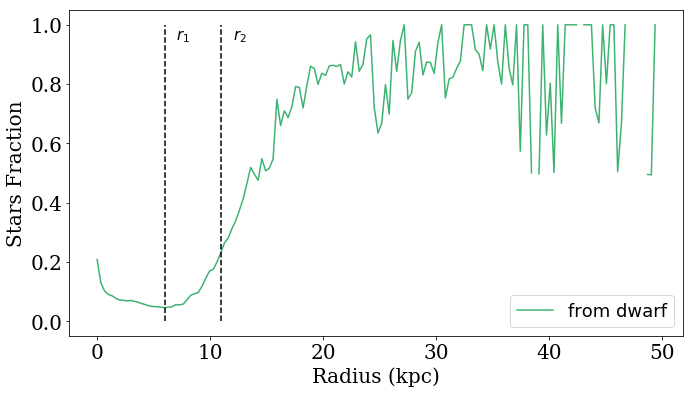

In [127]:
plt.figure(figsize=(11,6))
plt.plot(xaxis, frac_dwa, color='mediumseagreen', label='from dwarf')
plt.plot(np.ones(7)*r_1, np.arange(7)/6,color='black',linestyle="--")
plt.plot(np.ones(7)*r_2, np.arange(7)/6,color='black',linestyle="--")

plt.ylabel(r'Stars Fraction',fontsize=20, family='serif', weight='ultralight')
plt.xlabel('Radius (kpc)',fontsize=20, family='serif', weight='ultralight')
plt.xticks(fontsize=20, family='serif')
plt.yticks(fontsize=20, family='serif')
#plt.xlim([-1,76])
plt.annotate('$r_1$', xy =( float(r_1)+1, 0.95), fontsize=15 )
plt.annotate('$r_2$', xy =( float(r_2)+1, 0.95), fontsize=15 )
plt.legend(fontsize=18)
#plt.savefig('694_1000_age_profile.png',dpi=400)
plt.show()

In [128]:
ds.field_list

[('DarkMatter', 'Coordinates'),
 ('DarkMatter', 'Epsilon'),
 ('DarkMatter', 'Mass'),
 ('DarkMatter', 'Phi'),
 ('DarkMatter', 'Velocities'),
 ('DarkMatter', 'iord'),
 ('Gas', 'Coordinates'),
 ('Gas', 'Density'),
 ('Gas', 'Epsilon'),
 ('Gas', 'Mass'),
 ('Gas', 'Metals'),
 ('Gas', 'Phi'),
 ('Gas', 'Temperature'),
 ('Gas', 'Velocities'),
 ('Gas', 'iord'),
 ('Stars', 'Coordinates'),
 ('Stars', 'Epsilon'),
 ('Stars', 'FormationTime'),
 ('Stars', 'Mass'),
 ('Stars', 'Metals'),
 ('Stars', 'Phi'),
 ('Stars', 'Velocities'),
 ('Stars', 'iord'),
 ('all', 'Coordinates'),
 ('all', 'Epsilon'),
 ('all', 'Mass'),
 ('all', 'Phi'),
 ('all', 'Velocities'),
 ('all', 'iord')]

## Stars from dwarf

In [129]:
def Stars_from_dwarf(pfilter, data):
    filter = index_dwarf
    return filter 

yt.add_particle_filter("Stars_from_dwarf", function=Stars_from_dwarf,
                       filtered_type='Stars', requires=["particle_ones"])
ds.add_particle_filter('Stars_from_dwarf')

True

In [130]:
def Stars_from_host(pfilter, data):
    Filter = index_host
    filter = Filter
    return filter 

yt.add_particle_filter("Stars_from_host", function=Stars_from_host,
                       filtered_type='Stars', requires=["particle_ones"])
ds.add_particle_filter('Stars_from_host')

True

In [131]:
def Stars_after_merger(pfilter, data):
    Filter = ds.all_data()['Stars','FormationTime'] > 4 * yt.units.Gyr
    filter = Filter
    return filter 

yt.add_particle_filter("Stars_after_merger", function=Stars_after_merger,
                       filtered_type='Stars', requires=["particle_ones"])
ds.add_particle_filter('Stars_after_merger')

True

In [132]:
def Profile_synthesis( Radius, Mass, FormationTime, n_bins):
    rr      = Radius.in_cgs()
    yy      = Mass.in_cgs()
    zz      = (ds.current_time - FormationTime).in_cgs()
    raxis   = yt.YTArray(np.zeros(n_bins), rr.units)
    yaxis   = yt.YTArray(np.zeros(n_bins), str(yy.units)+'/'+str(rr.units)+'**2')#
    zaxis   = yt.YTArray(np.zeros(n_bins), zz.units)
    rstep   = (50*yt.units.kpc).in_cgs() / n_bins
        
    for jj in range(n_bins):# total mass profile
        booleanr = (rr>jj*rstep) & (rr<=(jj+1)*rstep)
        raxis[jj] = jj * rstep
        yaxis[jj] = ( yy[booleanr] ).sum() / (C.pi*(2*jj+1)*rstep**2)
        zaxis[jj] = ( (zz*yy)[booleanr] ).sum() / yy[booleanr].sum()
        
    
    return([raxis, yaxis, zaxis])

In [133]:
index_dwa_in_gala = np.isin( host_galaxy['Stars','iord'], ds.all_data()['Stars_from_dwarf', 'iord'])
index_hos_in_gala = np.isin( host_galaxy['Stars','iord'], ds.all_data()['Stars_from_host', 'iord'])
index_kid_in_gala = np.isin( host_galaxy['Stars','iord'], ds.all_data()['Stars_after_merger', 'iord'])

bins = 100

xaxis, pro_den_all, pro_age_all = Profile_synthesis( Radius=r_cylindrical,
                                                  Mass=host_galaxy['Stars','Mass'],
                                                    FormationTime=host_galaxy['Stars','FormationTime'],
                                                  n_bins=bins )
xaxis, pro_den_dwa, pro_age_dwa = Profile_synthesis( Radius=r_cylindrical[index_dwa_in_gala],
                                                  Mass=host_galaxy['Stars','Mass'][index_dwa_in_gala],
                                                    FormationTime=host_galaxy['Stars','FormationTime'][index_dwa_in_gala],
                                                  n_bins=bins )
xaxis, pro_den_hos, pro_age_hos = Profile_synthesis( Radius=r_cylindrical[index_hos_in_gala],
                                                  Mass=host_galaxy['Stars','Mass'][index_hos_in_gala],
                                                    FormationTime=host_galaxy['Stars','FormationTime'][index_hos_in_gala],
                                                  n_bins=bins )
xaxis, pro_den_kid, pro_age_kid = Profile_synthesis( Radius=r_cylindrical[index_kid_in_gala],
                                                  Mass=host_galaxy['Stars','Mass'][index_kid_in_gala],
                                                    FormationTime=host_galaxy['Stars','FormationTime'][index_kid_in_gala],
                                                  n_bins=bins )

In [135]:
r_break = r_break0

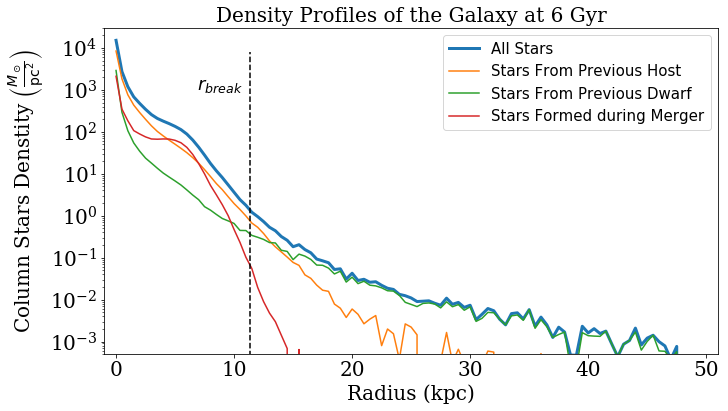

In [136]:
plt.figure(figsize=(11,6))

plt.plot(xaxis.in_units('kpc'), pro_den_all.in_units('Msun/pc**2'), label='All Stars', linewidth=3)
plt.plot(xaxis.in_units('kpc'), pro_den_hos.in_units('Msun/pc**2'), label='Stars From Previous Host')
plt.plot(xaxis.in_units('kpc'), pro_den_dwa.in_units('Msun/pc**2'), label='Stars From Previous Dwarf')
plt.plot(xaxis.in_units('kpc'), pro_den_kid.in_units('Msun/pc**2'), label='Stars Formed during Merger')

#plt.plot(np.arange(5)*10, np.ones(5)*1e-1,color='black',linestyle="--")
plt.plot(np.ones(5)*r_break, np.arange(5)*2e3,color='black',linestyle="--")

plt.yscale('log')
plt.ylabel(r'Column Stars Denstity $\left(\frac{M_\odot}{\rm{pc}^2}\right)$',
           fontsize=20, family='serif', weight='ultralight')
plt.xlabel('Radius (kpc)',fontsize=20, family='serif', weight='ultralight')
plt.xticks(fontsize=20, family='serif')
plt.yticks(fontsize=20, family='serif')
#plt.annotate('$r_1$', xy =( float(r_1)+1, 1e4), fontsize=15 )
plt.annotate('$r_{break}$', xy =( float(r_break)-4.5, 1e3), fontsize=18 )
plt.xlim([-1,51]);
plt.ylim([5e-4,3e4])
plt.title('Density Profiles of the Galaxy at 6 Gyr', fontsize=20, family='serif');
plt.legend(fontsize=15);
plt.savefig('694_den_profiles.png',dpi=400)
plt.show()

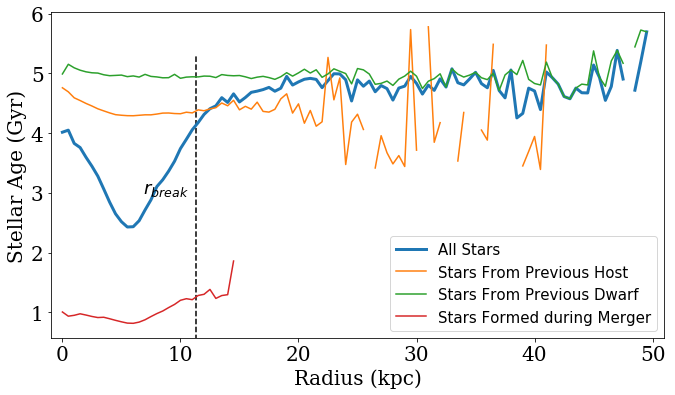

In [137]:
plt.figure(figsize=(11,6))

plt.plot(xaxis.in_units('kpc'), pro_age_all.in_units('Gyr'), label='All Stars', linewidth=3)
plt.plot(xaxis.in_units('kpc'), pro_age_hos.in_units('Gyr'), label='Stars From Previous Host')
plt.plot(xaxis.in_units('kpc'), pro_age_dwa.in_units('Gyr'), label='Stars From Previous Dwarf')
plt.plot(xaxis.in_units('kpc'), pro_age_kid.in_units('Gyr'), label='Stars Formed during Merger')

plt.xlim([-1,51])
plt.ylim((plt.ylim()))
plt.vlines(r_break, ymin=0, ymax=5.3, color='black',linestyle="--")

plt.ylabel(r'Stellar Age (Gyr)',fontsize=20, family='serif', weight='ultralight')
plt.xlabel('Radius (kpc)',fontsize=20, family='serif', weight='ultralight')
plt.xticks(fontsize=20, family='serif')
plt.yticks(fontsize=20, family='serif')

#plt.annotate('$r_1$', xy =( float(r_1)+1, 5.5), fontsize=15 )
plt.annotate('$r_{break}$', xy =( float(r_break)-4.5, 3), fontsize=18 )
plt.legend(fontsize=15);
plt.savefig('694_age_profiles.png',dpi=400)
plt.show()

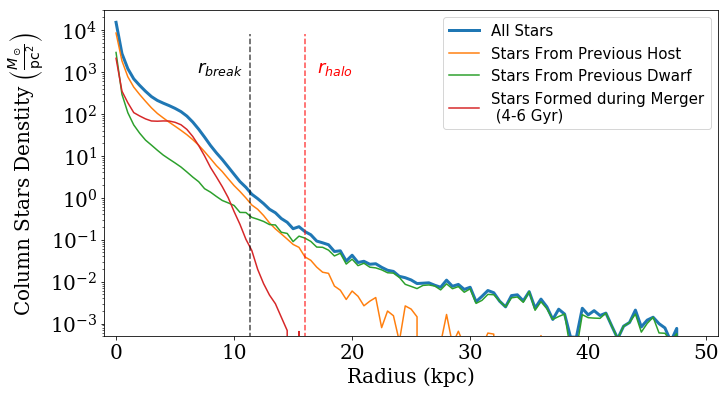

In [138]:
plt.figure(figsize=(11,6))

plt.plot(xaxis.in_units('kpc'), pro_den_all.in_units('Msun/pc**2'), label='All Stars', linewidth=3)
plt.plot(xaxis.in_units('kpc'), pro_den_hos.in_units('Msun/pc**2'), label='Stars From Previous Host')
plt.plot(xaxis.in_units('kpc'), pro_den_dwa.in_units('Msun/pc**2'), label='Stars From Previous Dwarf')
plt.plot(xaxis.in_units('kpc'), pro_den_kid.in_units('Msun/pc**2'), label='Stars Formed during Merger\n (4-6 Gyr)')

#plt.plot(np.ones(5)*r_1, np.arange(5)*1e4,color='black',linestyle="--")
plt.plot(np.ones(5)*r_break, np.arange(5)*2e3, color='black',linestyle="--", alpha=0.7)
plt.plot(np.ones(5)*r_3, np.arange(5)*2e3, color='red',  linestyle="--", alpha=0.7)

plt.yscale('log')
plt.ylabel(r'Column Stars Denstity $\left(\frac{M_\odot}{\rm{pc}^2}\right)$',
           fontsize=20, family='serif', weight='ultralight')
plt.xlabel('Radius (kpc)',fontsize=20, family='serif', weight='ultralight')
plt.xticks(fontsize=20, family='serif')
plt.yticks(fontsize=20, family='serif')
#plt.annotate('$r_1$', xy =( float(r_1)+1, 1e4), fontsize=15 )
plt.annotate('$r_{break}$', xy =( float(r_break)-4.5, 1e3), fontsize=18 )
plt.annotate('$r_{halo}$',  xy =( float(r_3)+1,   1e3), fontsize=18, color='red')
plt.xlim([-1,51]);
plt.ylim([5e-4,3e4]);
plt.legend(fontsize=15);
plt.savefig('694_den_profiles2.png',dpi=400)
plt.show()

In [165]:
?curve_fit

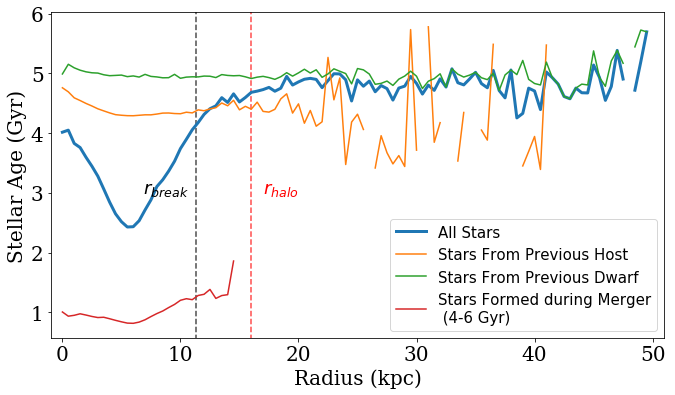

In [139]:
plt.figure(figsize=(11,6))

plt.plot(xaxis.in_units('kpc'), pro_age_all.in_units('Gyr'), label='All Stars', linewidth=3)
plt.plot(xaxis.in_units('kpc'), pro_age_hos.in_units('Gyr'), label='Stars From Previous Host')
plt.plot(xaxis.in_units('kpc'), pro_age_dwa.in_units('Gyr'), label='Stars From Previous Dwarf')
plt.plot(xaxis.in_units('kpc'), pro_age_kid.in_units('Gyr'), label='Stars Formed during Merger\n (4-6 Gyr)')

plt.xlim([-1,51])
plt.ylim((plt.ylim()))
plt.vlines(r_break, ymin=0, ymax=6.3, color='black',linestyle="--", alpha=0.7)
plt.vlines(r_3, ymin=0, ymax=6.3, color='red'  ,linestyle="--", alpha=0.7)

plt.ylabel(r'Stellar Age (Gyr)',fontsize=20, family='serif', weight='ultralight')
plt.xlabel('Radius (kpc)',fontsize=20, family='serif', weight='ultralight')
plt.xticks(fontsize=20, family='serif')
plt.yticks(fontsize=20, family='serif')

#plt.annotate('$r_1$', xy =( float(r_1)+1, 5.5), fontsize=15 )
plt.annotate('$r_{break}$', xy =( float(r_break)-4.5, 3), fontsize=18 )
plt.annotate('$r_{halo}$',  xy =( float(r_3)+1,   3), fontsize=18, color='red' )
plt.legend(fontsize=15);
plt.savefig('694_age_profiles2.png',dpi=400)
plt.show()

In [140]:
r_disc    = np.array( xaxis.in_units('kpc') )[xaxis<r_3]
dens_disc = np.array( (pro_den_all-pro_den_dwa).in_units('Msun/pc**2') )[xaxis<r_3]

smoothed_den = convolve(np.log10(dens_disc), Box1DKernel(4))
grad = np.gradient(np.gradient(smoothed_den))
grad = grad[~np.isnan(grad) & ~np.isinf(grad)]
for i in range(0,20):
    grad=grad[np.fabs(grad-grad.mean())<3*np.std(grad,ddof=1)]
    #更新一维数组
    #迭代20次,输出是检查循环的进行 
sigma_profile = grad.std(ddof=1)
'''
grad = np.gradient(np.gradient(smoothed_den))
for i in range(len(grad)):
    if np.fabs(grad)[i]<=(sigma_profile) and\
        np.fabs(grad)[i+1]<=(sigma_profile) and \
        np.fabs(grad)[i+2]<=(sigma_profile):
        break
'''
for i in range(len(np.gradient(np.gradient(smoothed_den)))):
    for j in range(11):
        if np.fabs(np.gradient(np.gradient(smoothed_den)))[i+j]>(sigma_profile):
            break
    if j >= 9:
        break
        
r_in = np.array(xaxis[i].in_units('kpc'))
print(r_in)

param_set, param_cov = curve_fit(I_fit, xdata = r_disc[(r_disc>=r_in) & (dens_disc!=0)], ydata = np.log10(dens_disc[(r_disc>=r_in) & (dens_disc!=0)]),
                                 bounds=([0,0.1,0,0,r_in], [np.inf,1,np.inf,np.inf,np.inf]),
                                p0=[1,0.5,1,1,0.5*(min(r_disc)+max(r_disc))])
r_break = param_set[4]
print(param_set)

2.5
[366.03255027   1.           1.31408629  16.79608563   4.23545905]


In [141]:
rmax = xaxis[pro_den_kid == pro_den_kid[xaxis>3*yt.units.kpc].max()]

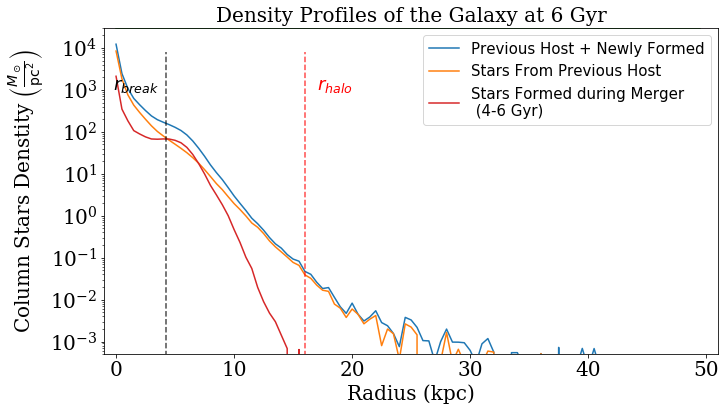

In [142]:
plt.figure(figsize=(11,6))

#plt.plot(xaxis.in_units('kpc'), pro_den_all.in_units('Msun/pc**2'), label='All Stars', linewidth=3)
plt.plot(xaxis.in_units('kpc'), (pro_den_all-pro_den_dwa).in_units('Msun/pc**2'), label='Previous Host + Newly Formed')
plt.plot(xaxis.in_units('kpc'), pro_den_hos.in_units('Msun/pc**2'), label='Stars From Previous Host')
plt.plot(xaxis.in_units('kpc'), 3e4 * np.ones(len(xaxis)))
#plt.plot(xaxis.in_units('kpc'), pro_den_dwa.in_units('Msun/pc**2'), label='Stars From Previous Dwarf')
plt.plot(xaxis.in_units('kpc'), pro_den_kid.in_units('Msun/pc**2'), label='Stars Formed during Merger\n (4-6 Gyr)')
#plt.plot(xaxis.in_units('kpc'), (pro_den_all-pro_den_dwa-pro_den_kid-pro_den_hos).in_units('Msun/pc**2'), label='mysterious')


plt.plot(np.ones(5)*r_break, np.arange(5)*2e3, color='black',linestyle="--", alpha=0.7)
plt.plot(np.ones(5)*r_3, np.arange(5)*2e3, color='red',  linestyle="--", alpha=0.7)
plt.plot(np.ones(5)*rmax, pro_den_kid[xaxis>3*yt.units.kpc].max().in_units('Msun/pc**2')*np.arange(5)*1/4,
         color='blue',  linestyle="--", alpha=0.7)

plt.yscale('log')
plt.ylabel(r'Column Stars Denstity $\left(\frac{M_\odot}{\rm{pc}^2}\right)$',
           fontsize=20, family='serif', weight='ultralight')
plt.xlabel('Radius (kpc)',fontsize=20, family='serif', weight='ultralight')
plt.xticks(fontsize=20, family='serif')
plt.yticks(fontsize=20, family='serif')
#plt.annotate('$r_1$', xy =( float(r_1)+1, 1e4), fontsize=15 )
plt.annotate('$r_{break}$', xy =( float(r_break)-4.5, 1e3), fontsize=18 )
plt.annotate('$r_{halo}$',  xy =( float(r_3)+1,   1e3), fontsize=18, color='red')
plt.xlim([-1*yt.units.kpc,51*yt.units.kpc]);
plt.ylim([5e-4,3e4]);
plt.title('Density Profiles of the Galaxy at 6 Gyr', fontsize=20, family='serif');
plt.legend(fontsize=15);
#plt.savefig('694_den_profiles3.png',dpi=400)
plt.show()

In [143]:
ds = ds_array[5]
density = ds.all_data()[('Gas', 'Density')]
target  = np.where(density == density.max())[0][0]
del density
centerHost = ds.all_data()[('Gas', 'Coordinates')][target].in_units('kpc')
sphHost0 = ds.sphere(centerHost, (20, 'kpc')) 
centerHost = sphHost0.quantities.center_of_mass(use_gas=False, use_particles=True, particle_type='Stars')
sphHost1 = ds.sphere(centerHost, (20, 'kpc'))
sphHost_4_norm = ds.sphere(centerHost, (4, 'kpc'))
#计算 host 的角动量，作为其法线方向，再算出与法向量垂直的一个向量，当做画图时的北方
norm_host  = sphHost_4_norm.quantities.angular_momentum_vector(use_gas=False, use_particles=True, particle_type='Stars')
north_host = yt.YTArray(yt.ortho_find(norm_host), 'kpc')[1]

/home/protesticon/anaconda3/lib/python3.6/site-packages/yt/fields/derived_field.py:256: VisibleDeprecationWarning: The 'particle_velocity_relative' field has been deprecated in favor of 'relative_particle_velocity'.
  dd = self._function(self, data)


In [144]:
host_galaxy = ds.disk(centerHost, norm_host, r_3, (2, "kpc"))
#index_ID = np.isin( host_galaxy['Stars','iord'], ID)
r_cylindrical = np.sqrt( (host_galaxy[('Stars', 'particle_position_relative_x')])**2 \
                         + (host_galaxy[('Stars', 'particle_position_relative_y')])**2 ).in_units('kpc')
cos = ((host_galaxy[('Stars', 'relative_particle_velocity')][:,[0,1]] * host_galaxy[('Stars', 'relative_particle_position')][:,[0,1]]).sum(axis=1) / (np.linalg.norm(host_galaxy[('Stars', 'relative_particle_position')][:,[0,1]],axis=1) * np.linalg.norm(host_galaxy[('Stars', 'relative_particle_velocity')][:,[0,1]],axis=1))).base
theta = np.arccos(cos) * 180 / C.pi

/home/protesticon/anaconda3/lib/python3.6/site-packages/yt/fields/derived_field.py:256: VisibleDeprecationWarning: The 'particle_position_relative' field has been deprecated in favor of 'relative_particle_position'.
  dd = self._function(self, data)


In [ ]:
    ii=5
    '''
    ds = ds_array[5]
    density = ds.all_data()[('Gas', 'Density')]
    target  = np.where(density == density.max())[0][0]
    del density
    centerHost = ds.all_data()[('Gas', 'Coordinates')][target].in_units('kpc')
    sphHost0 = ds.sphere(centerHost, (20, 'kpc')) 
    centerHost = sphHost0.quantities.center_of_mass(use_gas=False, use_particles=True, particle_type='Stars')
    sphHost1 = ds.sphere(centerHost, (20, 'kpc'))
    sphHost_4_norm = ds.sphere(centerHost, (4, 'kpc'))
    #计算 host 的角动量，作为其法线方向，再算出与法向量垂直的一个向量，当做画图时的北方
    norm_host  = sphHost_4_norm.quantities.angular_momentum_vector(use_gas=False, use_particles=True, particle_type='Stars')
    north_host = yt.YTArray(yt.ortho_find(norm_host), 'kpc')[1]
    '''
    pp_all_star = yt.OffAxisProjectionPlot(ds, norm_host, ('deposit', 'Stars_after_merger_density'),
                                            center=centerHost, width=(100,'kpc'), depth=(100,'kpc'),
                                            north_vector=north_host, method='integrate', fontsize=40)
    pp_all_star.set_unit(('deposit', 'Stars_after_merger_density'), 'Msun/pc**2')
    pp_all_star.set_cmap(('deposit', 'Stars_after_merger_density'), 'jet')
    pos_of_annotate1 = yt.YTArray([-30, 30], input_units='kpc')
    pos_of_annotate2 = yt.YTArray([-30,-30], input_units='kpc')
    pp_all_star.annotate_clear()
    pp_all_star.annotate_text(pos_of_annotate1, '%2d'%(ii+1)+' Gyr', coord_system='plot', text_args={'color':'black'})
    pp_all_star.annotate_text(pos_of_annotate2, 'Formed in the Last 2 Gyr', coord_system='plot', text_args={'color':'black'})
    #pp_all_star.annotate_line([0, 0.35], [1, 0.35], coord_system='axis',
    #                plot_args={'color':'black', 'linestyle':'--'})
    #pp_all_star.annotate_line([0, 0.65], [1, 0.65], coord_system='axis',
    #                plot_args={'color':'black', 'linestyle':'--'})
    pp_all_star.annotate_sphere(centerHost, radius=(rmax, 'kpc'),
                          circle_args={'color':'blue', 'linestyle':'--'})
    pp_all_star.set_zlim(('deposit', 'Stars_after_merger_density'), 1e-4, 1e5)
    pp_all_star.set_colorbar_label(('deposit', 'Stars_after_merger_density'), 'Projected Stars Density'+r'$\left(\frac{M_\odot}{\rm{pc}^2}\right)$')


    pp_all_star.save('figs/694_'+'%02d'%(ii+1)+'00_dwa_star0.png', mpl_kwargs={'dpi':600})
    pp_all_star

yt : [INFO     ] 2019-05-08 18:03:14,869 xlim = -50.000000 50.000000
yt : [INFO     ] 2019-05-08 18:03:14,878 ylim = -50.000000 50.000000
yt : [INFO     ] 2019-05-08 18:03:14,879 zlim = -50.000000 50.000000
yt : [INFO     ] 2019-05-08 18:03:14,880 Making a fixed resolution buffer of (('deposit', 'Stars_after_merger_density')) 800 by 800
yt : [INFO     ] 2019-05-08 18:03:44,474 Saving plot figs/694_0600_dwa_star0.png


yt : [INFO     ] 2019-04-22 16:52:31,587 xlim = -50.000000 50.000000
yt : [INFO     ] 2019-04-22 16:52:31,612 ylim = -50.000000 50.000000
yt : [INFO     ] 2019-04-22 16:52:31,614 zlim = -50.000000 50.000000
yt : [INFO     ] 2019-04-22 16:52:31,642 Making a fixed resolution buffer of (('deposit', 'Gas_density')) 800 by 800



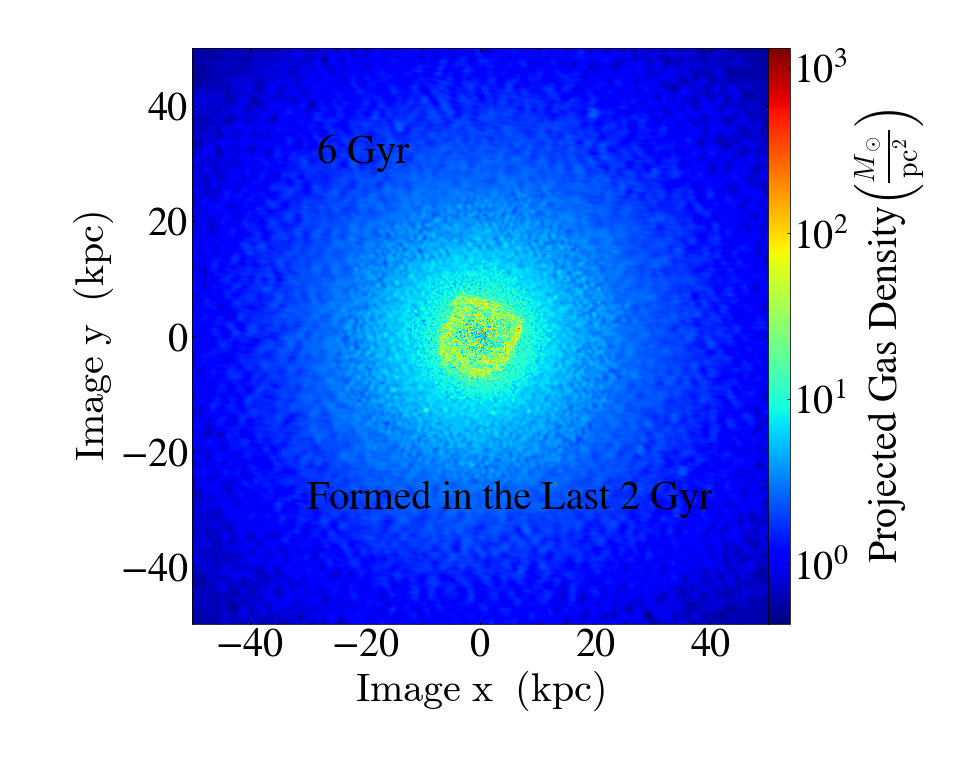

In [708]:
    pp_all_star = yt.OffAxisProjectionPlot(ds, norm_host, ('deposit', 'Gas_density'),
                                            center=centerHost, width=(100,'kpc'), depth=(100,'kpc'),
                                            north_vector=north_host, method='integrate', fontsize=40)
    pp_all_star.set_unit(('deposit', 'Gas_density'), 'Msun/pc**2')
    pp_all_star.set_cmap(('deposit', 'Gas_density'), 'jet')
    pos_of_annotate1 = yt.YTArray([-30, 30], input_units='kpc')
    pos_of_annotate2 = yt.YTArray([-30,-30], input_units='kpc')
    pp_all_star.annotate_clear()
    pp_all_star.annotate_text(pos_of_annotate1, '%2d'%(ii+1)+' Gyr', coord_system='plot', text_args={'color':'black'})
    #pp_all_star.annotate_text(pos_of_annotate2, 'Formed in the Last 2 Gyr', coord_system='plot', text_args={'color':'black'})
    #pp_all_star.annotate_line([0, 0.35], [1, 0.35], coord_system='axis',
    #                plot_args={'color':'black', 'linestyle':'--'})
    #pp_all_star.annotate_line([0, 0.65], [1, 0.65], coord_system='axis',
    #                plot_args={'color':'black', 'linestyle':'--'})
    #pp_all_star.set_zlim(('deposit', 'Gas_density'), 1e-4, 1e5)
    pp_all_star.set_colorbar_label(('deposit', 'Gas_density'), 'Projected Gas Density'+r'$\left(\frac{M_\odot}{\rm{pc}^2}\right)$')


    #pp_all_star.save('figs/694_'+'%02d'%(ii+1)+'00_all_star1.png', mpl_kwargs={'dpi':600})
    pp_all_star